<a href="https://colab.research.google.com/github/fauzangifari/miniproject-datamining/blob/main/Check_Point_5_Datmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rata-Rata Waktu yang Dihabiskan Oleh Pengguna Di Media Sosial**

#**Import Library**

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Dataset ini memiliki tujuan bisnis yang jelas, yaitu untuk memperoleh pemahaman yang mendalam mengenai rata-rata waktu yang dihabiskan oleh pengguna media sosial. Lebih dari itu, dataset ini juga memiliki potensi untuk memberikan kontribusi yang signifikan bagi platform media sosial, pengiklan, pembuat konten, dan para peneliti. Dengan informasi yang tersedia dalam dataset ini, pihak-pihak terkait dapat merancang strategi yang lebih efektif dan memahami dampak media sosial secara lebih komprehensif terhadap individu maupun masyarakat secara keseluruhan.

##**Assess Situation**

Analisis ini didasari oleh situasi bisnis yang penting, yaitu untuk mendalami perilaku pengguna saat menggunakan media sosial setiap hari. Dalam hal ini, pemahaman lebih lanjut tentang bagaimana interaksi dengan platform media sosial dapat memengaruhi produktivitas individu menjadi fokus utama. Dengan pemahaman yang lebih baik tentang dinamika ini, perusahaan dan individu dapat mengembangkan strategi yang lebih efektif untuk mengelola waktu dan meningkatkan produktivitas mereka.

##**Data Mining Goals**

Tujuan dari Data Mining pada dataset ini adalah untuk menganalisis data yang akan digunakan sebagai prediksi perilaku masa depan pengguna berdasarkan pola waktu yang dihabiskan, serta untuk melakukan perbandingan antara rata-rata waktu yang dihabiskan di berbagai platform media sosial. Melalui pemahaman yang mendalam dari data rata-rata waktu yang dihabiskan oleh pengguna media sosial, berbagai tujuan data mining tersebut dapat membantu perusahaan dan peneliti dalam memahami perilaku pengguna dengan lebih baik, serta merancang strategi yang lebih efektif.

##**Project Plan**

Rencana proyek ini dimulai dengan pengumpulan data dari sumber yang tersedia, diikuti oleh pemrosesan data untuk membersihkan dan mempersiapkannya. Kemudian, dilakukan analisis untuk memahami pola-pola yang terkandung di dalamnya, dan hasilnya akan divisualisasikan untuk mempresentasikan temuan dan wawasan yang diperoleh. Data juga akan dikelompokkan berdasarkan pola waktu yang dihabiskan, langkah-langkah ini penting untuk menjamin keberhasilan analisis data.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Dari dataset di bawah ini, yang didapatkan dari situs web bernama Keggle, data ini mencakup rata-rata waktu yang dihabiskan oleh pengguna media sosial.

Link DataSet:https://www.kaggle.com/datasets/imyjoshua/average-time-spent-by-a-user-on-social-media

In [133]:
DATA_URL="https://raw.githubusercontent.com/fauzangifari/miniproject-datamining/main/dataset.csv"

In [134]:
df = pd.read_csv(DATA_URL)
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


Informasi di atas adalah data yang terdapat dalam dataset yang diambil dari Kaggle.

##**Describe Data**

####Informasi Dasar

In [135]:
print(df)
print("Jumlah Baris", df.shape[0])
print("Jumlah Kolom" , df.shape[1])

     age      gender  time_spent   platform  interests        location  \
0     56        male           3  Instagram     Sports  United Kingdom   
1     46      female           2   Facebook     Travel  United Kingdom   
2     32        male           8  Instagram     Sports       Australia   
3     60  non-binary           5  Instagram     Travel  United Kingdom   
4     25        male           1  Instagram  Lifestlye       Australia   
..   ...         ...         ...        ...        ...             ...   
995   22      female           8  Instagram  Lifestlye  United Kingdom   
996   40  non-binary           6    YouTube     Travel  United Kingdom   
997   27  non-binary           5    YouTube     Travel  United Kingdom   
998   61      female           4    YouTube     Sports       Australia   
999   19      female           8    YouTube     Travel       Australia   

    demographics         profession  income  indebt  isHomeOwner  Owns_Car  
0          Urban  Software Enginee

Setelah mengakses DataFrame yang tersedia, terdapat bahwa DataFrame tersebut terdiri dari 1000 baris dan 12 kolom.

####Informasi Lanjutan

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


Dari data di atas, terdapat kolom sebanyak 12 yang memiliki tipe data yang berbeda-beda serta fungsi yang beragam:

1. **Age**: Kolom ini menggunakan tipe data int64, menunjukkan bahwa setiap nilai dalam kolom tersebut merupakan bilangan bulat. Hal ini sesuai karena umur umumnya direpresentasikan dalam bentuk bilangan bulat. Kolom ini digunakan untuk menyimpan informasi tentang usia pengguna, memberikan gambaran tentang rentang usia dari pengguna dalam dataset tersebut.

2. **Gender**: Kolom ini menggunakan tipe data object, menunjukkan bahwa setiap nilai di dalamnya direpresentasikan sebagai teks. Nilai-nilai dalam kolom Gender mungkin berisi kata-kata seperti "pria", "wanita", "non-biner", atau variasi lain yang mengidentifikasi jenis kelamin seseorang. Kolom ini memberikan informasi tentang jenis kelamin pengguna dalam dataset tersebut.

3. **Time Spent**: Kolom ini menggunakan tipe data int64, menunjukkan bahwa setiap nilai dalam kolom tersebut adalah bilangan bulat. Ini sesuai karena waktu umumnya direpresentasikan dalam bentuk bilangan bulat, mungkin mewakili jam, menit, atau detik. Kolom ini berisi informasi tentang waktu yang dihabiskan oleh pengguna dalam dataset tersebut.

4. **Platform**: Kolom ini menggunakan tipe data object, menandakan bahwa setiap nilai di dalamnya direpresentasikan sebagai teks. Kolom ini berisi informasi tentang platform media sosial yang digunakan oleh pengguna dataset tersebut.

5. **Interests**: Kolom ini menggunakan tipe data object, menunjukkan bahwa setiap nilai dalam kolom tersebut berupa teks. Kolom ini mencerminkan minat atau hobi pengguna.

6. **Location**: Kolom ini menggunakan tipe data object, menunjukkan bahwa setiap nilai dalam kolom tersebut direpresentasikan sebagai teks. Kolom ini berisi informasi tentang lokasi atau tempat yang terkait dengan pengguna dataset tersebut, mungkin mencakup negara di mana pengguna berada.

7. **Demographics**: Kolom ini menggunakan tipe data object, menunjukkan bahwa setiap nilai di dalamnya direpresentasikan sebagai teks. Kolom ini berisi informasi demografis yang terkait dengan pengguna dataset tersebut, seperti urban, suburban, rural, dan sebagainya.

8. **Profession**: Kolom ini menggunakan tipe data object, menandakan bahwa setiap nilai dalam kolom tersebut direpresentasikan sebagai teks. Kolom ini berisi informasi tentang profesi atau pekerjaan yang terkait dengan pengguna dalam dataset tersebut.

9. **Income**: Kolom ini menggunakan tipe data int64, menunjukkan bahwa setiap nilai dalam kolom tersebut direpresentasikan dalam bentuk bilangan bulat. Nilai-nilai dalam kolom **Income** mungkin mewakili pendapatan pengguna dalam jumlah tertentu.

10. **InDebt**: Kolom ini menggunakan tipe data bool, menunjukkan bahwa setiap nilai dalam kolom ini hanya ada dua kemungkinan jawaban: True atau False. Ini berarti kolom ini mungkin digunakan untuk menunjukkan apakah pengguna memiliki hutang (True) atau tidak (False).

11. **isHomeOwner**: Kolom ini menggunakan tipe data bool, menunjukkan bahwa setiap nilai dalam kolom hanya memiliki dua kemungkinan jawaban: True atau False. Ini menunjukkan bahwa kolom ini mungkin digunakan untuk menunjukkan apakah pengguna memiliki rumah (True) atau tidak (False).

12. **Owns_car**: Kolom ini menggunakan tipe data bool, menunjukkan bahwa setiap nilai dalam kolom hanya memiliki dua kemungkinan jawaban: True atau False. Ini menunjukkan bahwa kolom ini mungkin digunakan untuk menunjukkan apakah pengguna memiliki mobil (True) atau tidak (False).

####Informasi Statistik Deskriptif

In [137]:
df.describe()

,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.029000,15014.823000
std,13.497852,2.537834,2958.628221
min,18.000000,1.000000,10012.000000
25%,29.000000,3.000000,12402.250000
50%,42.000000,5.000000,14904.500000
75%,52.000000,7.000000,17674.250000
max,64.000000,9.000000,19980.000000


Terdapat tabel diatas menunjukkan ringkasan statistik deskriptif untuk tiga kolom dalam dataset, yaitu age, time_spent, dan income:

1. Count: menunjukkan jumlah pengamatan atau observasi dalam setiap kolom. Misalnya ada 1000 data untuk age, time_spent, dan income.

2. Mean: ini adalah rata-rata dari nilai-nilai dalam setiap kolom. Untuk contoh ini, rata-rata usia adalah sekitar 41, rata-rata waktu yang dihabiskan adalah sekitar 5 jam, dan rata-rata pendapat adalah sekitar 15014 dolar.

3. Std (Standard Deviation): Standar deviasi mengukur seberapa tersebar atau beragam data dari rata-rata. Semakin tinggi nilai standar deviasi, semakin besar variabilitas data. Misalnya, standar deviasi untuk usia adalah sekitar 13.5 tahun, untuk waktu yang dihabiskan sekitar 2.5 jam, dan untuk pendapatan sekitar 2958 dolar.

4. Min: Nilai terkecil dalam setiap variabel. Misalnya, nilai minimum usia adalah 18 tahun, waktu terkecil yang dihabiskan adalah 1 jam, dan pendapatan minimum adalah 10012 dolar.

5. 25%, 50%, 75% (Percentiles): Ini adalah persentil dari data, yang membagi data menjadi empat bagian yang sama besar. Misalnya, 25% dari data memiliki usia kurang dari atau sama dengan 29 tahun, 50% memiliki usia kurang dari atau sama dengan 42 tahun (ini adalah median), dan 75% memiliki usia kurang dari atau sama dengan 52 tahun. Prosesnya sama untuk waktu yang dihabiskan dan pendapatan.

6. Max: Nilai terbesar dalam setiap variabel. Misalnya, nilai maksimum usia adalah 64 tahun, waktu maksimum yang dihabiskan adalah 9 jam, dan pendapatan maksimum adalah 19980 dolar.

##**Exploratory Data Analysis**

### Diagram Usia Pengguna Media Sosial






Text(0, 0.5, 'Jumlah Pengguna')

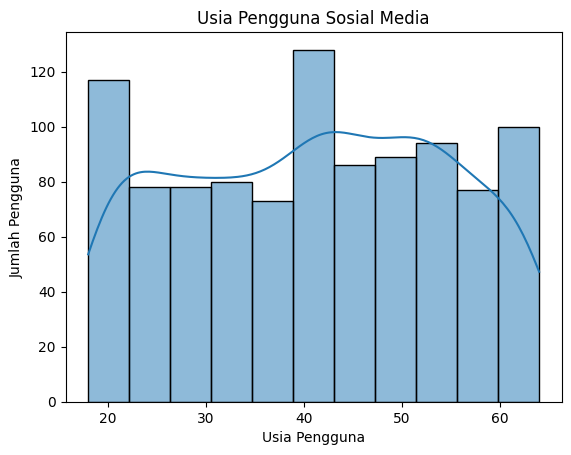

In [138]:
sns.histplot(df["age"],kde=True)
plt.title("Usia Pengguna Sosial Media")
plt.xlabel("Usia Pengguna")
plt.ylabel("Jumlah Pengguna")

**Korelasi**

Pada gambar diatas menunjukkan grafik histogram yang menghubungkan usia pengguna media sosial dengan jumlah pengguna. Grafik tersebut menunjukkan bahwa terdapat korelasi positif antara usia pengguna dan jumlah pengguna. Artinya, seiring bertambahnya usia, jumlah pengguna media sosial cenderung meningkat.

**Interpretasi**

Meskipun grafik tidak menunjukkan angka spesifik, tampaknya kelompok usia yang lebih muda (20-30) mungkin memiliki pengguna media sosial yang lebih sedikit dibandingkan dengan kelompok usia yang lebih tua (50-60). Hal ini mungkin dapat terjadi karena ada beberapa faktor:

- Prioritas hidup: Orang yang lebih muda mungkin fokus pada pendidikan, memulai karir, atau membesarkan keluarga, sehingga menyisakan sedikit waktu untuk terlibat di media sosial.

- Kenyamanan teknologi: Orang dewasa yang lebih tua mungkin semakin nyaman menggunakan teknologi dan platform media sosial karena semakin familiar dan mudah digunakan.

- Kebutuhan sosial: Orang dewasa yang lebih tua mungkin menggunakan media sosial untuk tetap terhubung dengan teman dan keluarga, terutama mereka yang tinggal jauh.

**Solutif**

Oleh karena itu, beberapa solusi untuk berpotensi meningkatkan penggunaan media sosial di kalangan kelompok usia yang lebih muda:
- Mengembangkan konten dan platform khusus usia: Sesuaikan konten dan fitur dengan minat dan kebutuhan pengguna yang lebih muda. Ini dapat melibatkan penggabungan tren populer, tantangan, dan fitur yang spesifik untuk preferensi mereka.

- Mempromosikan literasi digital: Menyediakan program dan sumber daya edukasi untuk membantu orang muda memahami manfaat dan potensi kelemahan penggunaan media sosial, mendorong perilaku online yang bertanggung jawab dan aman.

- Menjembatani kesenjangan generasi: Mendorong komunikasi dan kolaborasi antar generasi di platform media sosial. Ini dapat melibatkan pembuatan ruang online bersama atau kegiatan yang mendorong interaksi antara pengguna yang lebih muda dan lebih tua.

### Diagram Jenis Kelamin Pengguna Media Sosial

Text(0, 0.5, '')

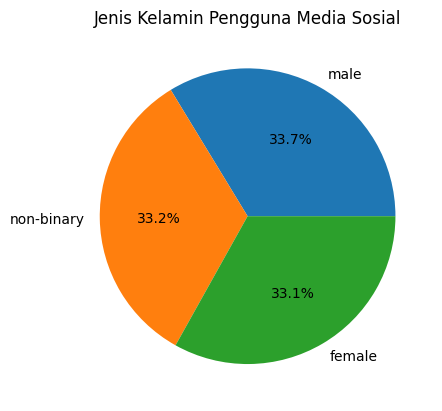

In [139]:
gender_counts = df['gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=360)
plt.title("Jenis Kelamin Pengguna Media Sosial")
plt.ylabel("")

Pada diagram lingkaran diatas ini menunjukkan bahwa:
- 33,7% pengguna media sosial dalam kumpulan data mengidentifikasi diri mereka sebagai laki-laki.
- 33,1% pengguna media sosial dalam kumpulan data mengidentifikasi diri mereka sebagai perempuan.
- 33,2% pengguna media sosial dalam kumpulan data mengidentifikasi sebagai non-biner.

Penting untuk diketahui bahwa data ini mungkin tidak mewakili keseluruhan populasi pengguna media sosial dan mungkin spesifik untuk wilayah, kelompok umur, atau platform tertentu.

<a name="diagram-platform-yang-sering-digunakan"></a>
### Diagram Platform yang sering digunakan


Text(0.5, 0, 'Platform Media Sosial')

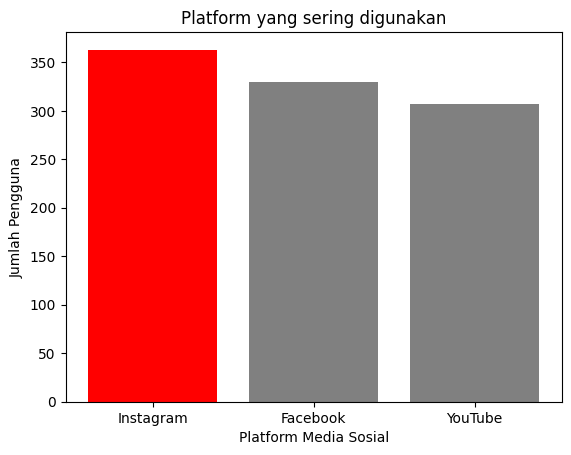

In [140]:
plt.bar(df['platform'].unique(), df['platform'].value_counts(), color=['red', 'gray', 'gray'])
plt.title("Platform yang sering digunakan")
plt.ylabel("Jumlah Pengguna")
plt.xlabel("Platform Media Sosial")

Berdasarkan pada grafik diatas menunjukkan Platform Instagram paling banyak diminati oleh kalangan pengguna media sosial, karena jumlah pengguna Instagram jauh lebih tinggi dibandingkan dengan platform lainnya. Hal ini menujukkan bahwa Instagram memiliki popularitas yang signifikan di antara pengguna media sosial.

### Diagram Rata-rata Waktu yang Dihabiskan di Platform Media Sosial

In [141]:
average_time_platform=df.groupby(by=['platform']).agg({'time_spent':'mean'}).reset_index()
fig=px.bar(average_time_platform,x='platform',y='time_spent',color='time_spent',title='Rata-rata Waktu yang Dihabiskan di Platform Media Sosial', labels={'time_spent': 'Waktu yang Dihabiskan', 'platform': 'Platform Media Sosial'})
fig.show(render='iframe')

Berdasarkan grafik di atas, terlihat bahwa Instagram merupakan platform media sosial yang paling banyak waktu yang dihabiskan dibandingkan dengan platform lainnya. Hal ini diperkuat oleh [Diagram Platform yang sering digunakan](#diagram-platform-yang-sering-digunakan) yang menunjukkan bahwa Instagram adalah platform yang paling populer berdasarkan data yang ada.

### Diagram rata-rata Waktu yang dihabiskan berdasarkan Jenis Kelamin

In [142]:
average_time_gender=df.groupby(by=['gender']).agg({'time_spent':'mean'}).reset_index()
fig=px.bar(average_time_gender,x='gender',y='time_spent',color='time_spent',title='Rata-rata Waktu yang Dihabiskan berdasarkan Jenis Kelamin', labels={'gender': 'Jenis Kelamin Pengguna', 'time_spent': 'Waktu yang Dihabiskan'})
fig.show(render='iframe')

Berdasarkan grafik di atas, dapat disimpulkan bahwa perempuan cenderung menghabiskan lebih banyak waktu di media sosial daripada laki-laki. Hal ini menunjukkan bahwa perempuan mungkin lebih aktif dalam interaksi sosial online atau memiliki preferensi yang berbeda dalam menggunakan platform media sosial.

### Diagram Rata-rata waktu yang dihabiskan berdasarkan pekerjaan

In [143]:
average_time_profession=df.groupby(by=['profession','platform']).agg({'time_spent':'mean'}).reset_index()
fig=px.bar(average_time_profession,x='profession',y='time_spent',color='platform',barmode='group',title='Rata-rata waktu yang dihabiskan berdasarkan pekerjaan')
fig.show(render='iframe')

Berdasarkan grafik di atas, dapat dilihat bahwa pekerjaan Marketer Manager cenderung lebih banyak menggunakan platform Facebook. Hal ini mungkin terkait dengan kebutuhan mereka untuk berinteraksi dengan pelanggan atau audiens potensial, serta melakukan pemasaran produk atau layanan. Sebaliknya, para Software Engineer dan Student tampaknya lebih banyak menggunakan Instagram. Ini bisa disebabkan oleh kebutuhan mereka untuk mencari informasi, terhubung dengan komunitas terkait bidang teknologi, atau hanya untuk bersosialisasi dengan teman-teman mereka.

##**Verify Data Quality**

####Missing Values

In [144]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
age,0.0
gender,0.0
time_spent,0.0
platform,0.0
interests,0.0
location,0.0
demographics,0.0
profession,0.0
income,0.0
indebt,0.0


Dalam tabel di atas, tidak terdapat nilai nol atau kosong dalam setiap kolom dataset. Ini menunjukkan bahwa setiap kolom dalam dataset memiliki nilai yang valid untuk setiap barisnya. Dengan persentase nol, dapat disimpulkan bahwa tidak ada kebutuhan untuk menangani nilai yang hilang dalam dataset untuk kolom-kolom tersebut.

####Outliers Values

In [145]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

for column in df.select_dtypes(include=['int64', 'float64']).columns:
    outliers = detect_outliers(df[column])
    if not outliers.empty:
        print(f"Outliers dalam kolom '{column}':")
        print(outliers)
    else:
        print(f"Tidak ada outliers dalam kolom '{column}'")

Tidak ada outliers dalam kolom 'age'
Tidak ada outliers dalam kolom 'time_spent'
Tidak ada outliers dalam kolom 'income'


Pada informasi diatas, dinyatakan tidak ada nilai yang jauh berbeda dari sebagian besar data dalam suatu dataset.

####Duplicated Values

In [146]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

Pada informasi diatas, dijelaskan bahwa setiap kolom tidak memiliki data yang duplikat.

####Inconsistent Values / Noise (Optional)

In [147]:
for column in df.columns:
    print(f"Column: {column}")
    unique_values_count = len(df[column].unique())
    print(f"Jumlah Nilai Unik: {unique_values_count}")
    print()

Column: age
Jumlah Nilai Unik: 47

Column: gender
Jumlah Nilai Unik: 3

Column: time_spent
Jumlah Nilai Unik: 9

Column: platform
Jumlah Nilai Unik: 3

Column: interests
Jumlah Nilai Unik: 3

Column: location
Jumlah Nilai Unik: 3

Column: demographics
Jumlah Nilai Unik: 3

Column: profession
Jumlah Nilai Unik: 3

Column: income
Jumlah Nilai Unik: 955

Column: indebt
Jumlah Nilai Unik: 2

Column: isHomeOwner
Jumlah Nilai Unik: 2

Column: Owns_Car
Jumlah Nilai Unik: 2



Pada informasi diatas, dijelaskan tentang jumlah nilai unik dalam setiap kolom dari dataset.
- Kolom **age**: Terdapat 47 nilai unik dalam kolom ini, yang berarti terdapat variasi usia dari pengguna dataset.
- Kolom **gender**: Terdapat 3 nilai unik dalam kolom ini, menunjukkan variasi jenis kelamin pengguna.
- Kolom **time_spent**: Terdapat 9 nilai unik dalam kolom ini, yang mungkin mewakili variasi waktu yang dihabiskan oleh pengguna di platform media sosial.
- Kolom **platform**: Terdapat 3 nilai unik dalam kolom ini, menunjukkan variasi platform media sosial yang digunakan oleh pengguna.
- Kolom **interests**: Terdapat 3 nilai unik dalam kolom ini, mungkin menggambarkan variasi minat atau hobi pengguna.
- Kolom **location**: Terdapat 3 nilai unik dalam kolom ini, yang mungkin mencerminkan variasi lokasi atau tempat tinggal pengguna.
- Kolom **demographics**: Terdapat 3 nilai unik dalam kolom ini, yang mungkin menggambarkan variasi demografis pengguna.
- Kolom **profession**: Terdapat 3 nilai unik dalam kolom ini, menunjukkan variasi profesi atau pekerjaan pengguna.
- Kolom **income**: Terdapat 955 nilai unik dalam kolom ini, yang mencerminkan variasi pendapatan dari pengguna dataset.
- Kolom **indebt**: Terdapat 2 nilai unik dalam kolom ini, yang mungkin menunjukkan apakah pengguna memiliki hutang atau tidak.
- Kolom **isHomeOwner**: Terdapat 2 nilai unik dalam kolom ini, menunjukkan apakah pengguna adalah pemilik rumah atau tidak.
- Kolom **Owns_Car**: Terdapat 2 nilai unik dalam kolom ini, yang mungkin menunjukkan apakah pengguna memiliki mobil atau tidak.

# **DATA PREPARATION**

## Data Cleaning

### Penanganan Missing Value

<a name="pengecekan-missing-value"></a>
#### Pengecekan Missing Value

In [148]:
print((df.isna().sum() / len(df)) * 100)

age             0.0
gender          0.0
time_spent      0.0
platform        0.0
interests       0.0
location        0.0
demographics    0.0
profession      0.0
income          0.0
indebt          0.0
isHomeOwner     0.0
Owns_Car        0.0
dtype: float64


Berdasarkan data diatas, tidak terdapat nilai yang hilang, yang menunjukkan keberhasilan dalam pengumpulan data secara lengkap dan konsisten.

#### Hapus Missing Value

Karena berdasarkan data yang diperoleh dari [pengecekan missing value](#pengecekan-missing-value) tidak terdapat nilai yang hilang, maka hal ini tidak perlu dilakukan.

#### Imputasi Missing Value

Karena berdasarkan data yang diperoleh dari [pengecekan missing value](#pengecekan-missing-value) tidak terdapat nilai yang hilang, maka hal ini tidak perlu dilakukan.

#### Pengecekkan Ulang

In [149]:
print((df.isna().sum() / len(df)) * 100)

age             0.0
gender          0.0
time_spent      0.0
platform        0.0
interests       0.0
location        0.0
demographics    0.0
profession      0.0
income          0.0
indebt          0.0
isHomeOwner     0.0
Owns_Car        0.0
dtype: float64


Setelah dilakukan pemeriksaan ulang, tidak ditemukan nilai yang hilang, sehingga data tetap lengkap dan konsisten.

### Penanganan Duplicated Values

#### Pengecekkan Nilai Duplikat

In [150]:
df[df.duplicated()]

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car


Berdasarkan data di atas, terdapat baris kosong dalam setiap kolom, menunjukkan bahwa tidak ada data yang duplikat dalam setiap kolom.

#### Hapus Nilai Duplikat

In [151]:
df = df.drop_duplicates()

Berdasarkan pengecekan nilai duplikat di atas, nilai yang duplikat akan dihapus secara otomatis. Jika tidak ada nilai duplikat, tidak akan ada perubahan yang terjadi.

### Penanganan Outliners

<a name="pengecekkan-outliers"></a>
#### Pengecekkan Outliers

In [152]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
age,0.0
time_spent,0.0
income,0.0


Berdasarkan tabel yang dihasilkan dari sintaks di atas, dapat dilihat bahwa ketiga kolom tersebut memiliki nilai Outliers sebesar 0.0. Hal ini mengindikasikan bahwa tidak ada data yang memiliki jangkauan yang signifikan atau terlalu jauh dari nilai-nilai lainnya.

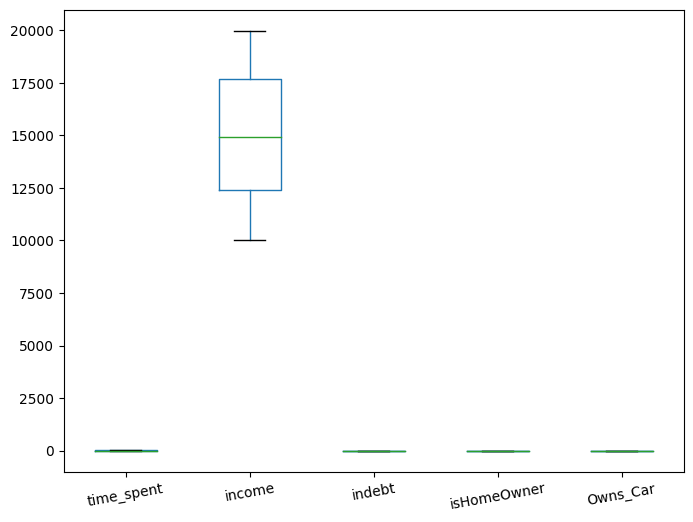

In [153]:
boxplot = df.drop('age', axis=1).boxplot(grid=False, rot=10,  figsize=(8,6))

Dari grafik yang ditampilkan, tidak ada tanda-tanda nilai yang berada di luar jangkauan yang biasa.

#### Hapus Outliners

In [154]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

In [155]:
Q1 = df['time_spent'].quantile(0.25)
Q3 = df['time_spent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['time_spent'] >= lower_bound) & (df['time_spent'] <= upper_bound)]

Karena berdasarkan data yang diperoleh dari [pengecekan outliers](#pengecekkan-outliers) tidak ditemukan nilai yang memiliki jangkauan yang signifikan atau terlalu jauh nilai-nilainya.

#### Imputasi Outliners

Karena berdasarkan data yang diperoleh dari [pengecekan outliers](#pengecekkan-outliers) tidak ditemukan nilai yang memiliki jangkauan yang signifikan atau terlalu jauh nilai-nilainya.

#### Pengecekkan Ulang

In [156]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
age,0.0
time_spent,0.0
income,0.0


Setelah dilakukan pemeriksaan ulang, tidak ditemukan nilai yang memiliki jangkauan yang signifikan atau terlalu jauh nilai-nilainya.

## Construct Data

#### Melakukan Rekayasa Fitur

In [157]:
def age_category(age):
    if age < 2:
        return 'Baby'
    elif 2 <= age <= 10:
        return 'Children'
    elif 10 < age <= 16:
        return 'Teenage'
    elif 16 < age <= 30:
        return 'Young Adults'
    elif 30 < age <= 50:
        return 'Adults'
    elif 50 < age <= 70:
        return 'Aged'
    else:
        return 'Old'

df['age_category'] = df['age'].apply(age_category)

Sintaks di atas bertujuan untuk mengkategorikan usia pengguna ke dalam berbagai kategori sesuai dengan rentang usia tertentu. Setiap kategori memiliki rentang usia yang spesifik. Misalnya, kategori **Children** untuk usia 2 hingga 10 tahun, **Teenage** untuk usia 11 hingga 16 tahun, dan seterusnya. Kemudian, hasil kategorisasi ini akan dimasukkan ke dalam kolom baru yang disebut **age_category** dalam sebuah dataframe.

#### Pengecekkan Hasil

In [158]:
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,age_category
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False,Aged
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True,Adults
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False,Adults
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False,Aged
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True,Young Adults


Pada tabel di atas, terdapat penambahan kolom baru yang disebut "age_category" di mana setiap entri kategori usia telah ditentukan berdasarkan rentang usia.

## Data Reduction

#### Mengurangi Fitur - Fitur Yang Kurang Relevan

In [159]:
df2 = df.drop(['indebt', 'income', 'isHomeOwner', 'Owns_Car', 'platform', 'interests', 'location', 'profession'], axis=1)

In [160]:
df_corr = df2.corr(numeric_only=True)
px.imshow(df_corr)

Sintaks di atas bertujuan untuk mengurangi fitur atau kolom yang kurang relevan dengan data yang dibahas:

1. **Income**: Kolom ini dihapus karena dalam konteks analisis waktu yang dihabiskan di media sosial, pendapatan individu mungkin tidak memiliki pengaruh signifikan terhadap pola penggunaan. Faktor-faktor lain seperti minat, lokasi, atau profesi mungkin memiliki dampak yang lebih besar.

2. **isHomeOwner**: Kepemilikan rumah tidak relevan dalam analisis waktu yang dihabiskan di media sosial karena tidak ada hubungan yang jelas antara kepemilikan rumah dan intensitas penggunaan platform tersebut. Oleh karena itu, kolom ini dihapus untuk menyederhanakan analisis dan fokus pada fitur yang lebih relevan.

3. **Owns_Car**: Serupa dengan kepemilikan rumah, kepemilikan mobil juga dianggap tidak relevan dalam analisis pola penggunaan media sosial. Faktor-faktor lain seperti minat atau lokasi mungkin memiliki pengaruh yang lebih signifikan. Oleh karena itu, kolom ini dihapus untuk menyederhanakan analisis dan memusatkan perhatian pada fitur yang lebih penting.

#### Pengecekkan Hasil

In [161]:
df2.head()

,age,gender,time_spent,demographics,age_category
0,56,male,3,Urban,Aged
1,46,female,2,Urban,Adults
2,32,male,8,Sub_Urban,Adults
3,60,non-binary,5,Urban,Aged
4,25,male,1,Urban,Young Adults


Pada tabel di atas, terdapat kolom "income", "isHomeOwner", dan "Owns_Car" yang sebelumnya ada, namun setelah dilakukan pembersihan data, kolom-kolom tersebut telah dihapus.

## Data Transformation

#### Mapping

In [162]:
df2['gender'] = df2['gender'].map({'male': 0, 'female': 1, 'non-binary': 2}).astype(int)

Pada sintaks di atas, tujuannya adalah untuk memudahkan identifikasi setiap jenis kelamin dengan memberikan kode numerik tertentu. Dalam hal ini, jenis kelamin "male" direpresentasikan dengan angka 0, "female" dengan angka 1, dan "non-binary" dengan angka 2. Hal ini membantu dalam analisis data dan pemrosesan oleh model atau algoritma machine learning.

In [163]:
df2['demographics'] = df2['demographics'].map({'Urban': 0, 'Sub_Urban': 1, 'Rural': 2}).astype(int)

Pada sintaks di atas, tujuannya adalah untuk memberikan klasifikasi numerik kepada setiap jenis demografi guna memudahkan analisis data. Dalam hal ini, demografi "urban" direpresentasikan dengan angka 0, "suburban" dengan angka 1, dan "rural" dengan angka 2. Hal ini membantu dalam mengelompokkan data dan memahami distribusi demografi dalam dataset dengan lebih efisien.

#### Pengecekkan Hasil

In [164]:
df2.head()

,age,gender,time_spent,demographics,age_category
0,56,0,3,0,Aged
1,46,1,2,0,Adults
2,32,0,8,1,Adults
3,60,2,5,0,Aged
4,25,0,1,0,Young Adults


## Dataframe to CSV

In [165]:
df2.to_csv('Data Cleaned.csv', index=False)

# **MODELLING**

## **Library Tambahan**

### **Core Library**

In [166]:
import numpy as np

### **Library untuk Splitting Data**

In [167]:
from sklearn.model_selection import train_test_split

### **Library untuk Normalisasi Data**

In [168]:
from sklearn.preprocessing import MinMaxScaler

### **Library untuk Build Model**

In [169]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler

## **Modelling Predict**

### **Select Modelling Techniques**

Berdasarkan pemahaman bisnis, analisis data ini bertujuan untuk mengeksplorasi Rata-Rata Waktu yang Dihabiskan Oleh Pengguna Di Media Sosial. Hal ini memiliki tujuan dalam Data Mining yang dapat membantu perusahaan dan peneliti memahami perilaku pengguna dengan lebih baik, serta merancang strategi yang lebih efektif. Oleh karena itu, teknik pemodelan yang digunakan dalam analisis ini adalah **Clustering (Pengelompokan)**. Dengan melakukan pengelompokan berdasarkan usia dan waktu yang dihabiskan, perusahaan dapat memperoleh wawasan yang berharga untuk merancang strategi yang lebih efektif dalam mengelola waktu dan meningkatkan produktivitas mereka.

### **Algoritma yang dipakai**

#### **Algoritma K-Means**

Algoritma K-Means adalah salah satu algoritma pengelompokan yang paling populer dalam analisis data. Metode ini bertujuan untuk mengelompokkan data ke dalam beberapa kelompok berdasarkan pola atribut yang serupa. Proses ini dilakukan dengan cara meminimalkan varians di dalam setiap kelompok, sehingga titik data dalam satu kelompok memiliki kemiripan yang tinggi, sementara titik data di kelompok yang berbeda memiliki perbedaan yang signifikan.

K-Means sangat cocok digunakan ketika tidak ada informasi label yang tersedia, seperti pada kasus analisis waktu yang dihabiskan oleh pengguna di media sosial. Dengan mengelompokkan pengguna berdasarkan pola waktu yang serupa, perusahaan dapat memahami perilaku pengguna dengan lebih baik dan merancang strategi yang lebih efektif dalam mengelola waktu serta meningkatkan produktivitas mereka.

#### **Algoritma Hierarchical Clustering**

Algoritma Hierarchical Clustering adalah salah satu metode pengelompokan dalam analisis data yang digunakan untuk mengelompokkan titik data ke dalam kelompok-kelompok berdasarkan tingkat kemiripan di antara mereka. Metode ini menghasilkan struktur hierarki dari kelompok-kelompok yang semakin besar atau semakin kecil, yang dapat direpresentasikan dalam bentuk dendrogram.

Algoritma Hierarchical Clustering dapat digunakan untuk memahami pola waktu yang dihabiskan oleh pengguna di media sosial. Hierarchical Clustering akan mengelompokkan pengguna berdasarkan kemiripan dalam pola waktu yang mereka habiskan, tanpa memerlukan jumlah kelompok yang ditentukan sebelumnya. Dengan demikian, algoritma ini cocok untuk mengeksplorasi variasi yang kompleks dalam perilaku pengguna.

### **Pre-Processing**

#### **Split Data**

In [170]:
x = df2.drop(['demographics', 'age_category'], axis=1)
y = df2['demographics']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [171]:
y_train.value_counts(normalize=True)

2    0.33875
1    0.33375
0    0.32750
Name: demographics, dtype: float64

In [172]:
y_test.value_counts(normalize=True)

2    0.345
1    0.340
0    0.315
Name: demographics, dtype: float64

Pada tahapan ini yaitu splitting data yang bertujuan untuk membagi dataset menjadi data latih (training data) dan data uji (testing data). Data latih digunakan untuk melatih model, sementara data uji digunakan untuk menguji kinerja model yang telah dilatih, memastikan bahwa model dapat menggeneralisasi dengan baik pada data yang tidak pernah dilihat sebelumnya.

#### **Normalisasi Data**

In [173]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

Pada tahap ini, dilakukan normalisasi data dengan memilih kolom-kolom yang memiliki tipe data Integer dan Float. Data train kemudian disesuaikan dengan kolom-kolom yang terpilih tersebut.

### **Build and Train Model**

#### **K-Means**

In [174]:
kmn = KMeans(n_clusters=3)
kmn.fit(x_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

Model K-Means akan dilatih menggunakan data latih yang telah dinormalisasi. Model ini kemudian dapat digunakan untuk memprediksi kelompok atau cluster dari data uji atau data baru yang memiliki fitur-fitur yang serupa.

#### **Hierarchical Clustering**

In [175]:
hrc = AgglomerativeClustering(n_clusters=3)
hrc.fit(x_train_norm, y_train)

AgglomerativeClustering(n_clusters=3)

Model Hierarchical Clustering akan dilatih menggunakan data latih yang telah dinormalisasi. Model ini kemudian dapat digunakan untuk memprediksi kelompok atau cluster dari data uji atau data baru yang memiliki fitur-fitur yang serupa.

### **Begins and Compare Predict**

In [176]:
kmn_pred = kmn.predict(x_test_norm)
hrc_pred = hrc.fit_predict(x_test_norm)

In [177]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

kmn_col = pd.DataFrame(kmn_pred.astype(int), columns=["kmn_prediction"])
hrc_col = pd.DataFrame(hrc_pred.astype(int), columns=["hrc_prediction"])

combined_data = pd.concat([x_test, y_test, kmn_col, hrc_col], axis=1)

In [178]:
combined_data.sample(10)

,age,gender,time_spent,demographics,kmn_prediction,hrc_prediction
4,61,1,2,0,2,2
68,51,1,3,1,2,2
163,45,0,5,2,2,0
57,28,1,7,0,0,0
116,56,1,2,0,2,2
195,54,2,2,2,1,2
192,62,0,7,2,0,0
37,33,0,6,2,0,0
197,40,1,1,2,2,2
154,21,2,4,2,1,1


Dalam tahap ini, pertama-tama kita melakukan prediksi menggunakan model K-Means (kmn) dan Hierarchical Clustering (hrc) pada data uji yang telah dinormalisasi. Kemudian, kita mengonversi data uji (x_test) dan label target (y_test) menjadi DataFrame dan me-reset indeksnya agar sesuai dengan indeks yang baru.

Selanjutnya, kita membuat DataFrame baru untuk menyimpan prediksi dari model K-Means (kmn_pred) dan Hierarchical Clustering (hrc_pred), dan memberi nama kolomnya sebagai "kmn_prediction" dan "hrc_prediction" sesuai dengan prediksi yang dihasilkan.

Terakhir, kita menggabungkan semua DataFrame yang telah dibuat sebelumnya, yaitu data uji (x_test), label target (y_test), serta prediksi dari model K-Means dan Hierarchical Clustering, untuk analisis lebih lanjut.

## **Modelling Associate**

### **Pre-Processing**

#### **Adjusment**

In [179]:
x_final = df2.drop(['demographics', 'age_category'], axis=1)

Pada tahap ini, kita menghilangkan beberapa kolom dari DataFrame (`df2`). Tujuannya adalah agar kita dapat fokus pada fitur-fitur lain dalam dataset dan menjalankan berbagai analisis atau pemodelan tanpa mempertimbangkan variabel "time_spent".

#### **Normalisasi Data**

In [180]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

Pada tahap ini, dilakukan normalisasi lagi untuk kolom-kolom yang telah diidentifikasi sebagai tipe data numerik. Metode fit_transform digunakan untuk menghitung statistik normalisasi dari data dan kemudian menerapkan normalisasi tersebut. Hasil normalisasi disimpan dalam variabel x_final_norm.

#### **Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

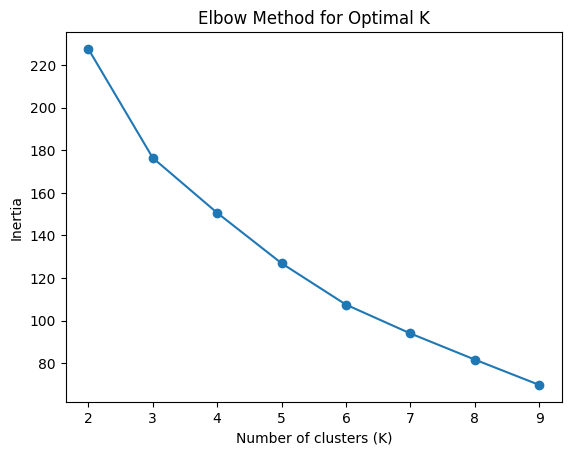

In [181]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

Pada grafik di atas, hasil dari kurva elbow menunjukkan titik di mana penurunan inersia berkurang secara signifikan, yang menciptakan bentuk mirip dengan siku-siku. Titik ini menunjukkan jumlah klaster yang optimal. Pada grafik tersebut, klaster 3 menunjukkan indikasi yang paling dekat dengan siku-siku.

### **Build Model**

#### **K-Means**

In [182]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

Pada tahap ini, kita menggunakan model K-Means untuk membuat 3 klaster, berdasarkan hasil grafik dari kurva elbow. Setelah itu, model K-Means dilatih pada data yang telah dinormalisasi.

#### **Hierarchical Clustering**

In [183]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



AgglomerativeClustering(affinity='euclidean', n_clusters=3)

Pada tahap ini, kita menggunakan model Agglomerative Clustering untuk membuat 3 klaster, berdasarkan hasil grafik dari kurva elbow. Setelah itu, model Hierarchical Clustering dilatih pada data yang telah dinormalisasi.

### **Begins and Comapare Clusters**

In [184]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [185]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

In [186]:
combined_data_assoc.head()

,age,gender,time_spent,kmeans_cluster,hierarchy_cluster
0,56,0,3,2,1
1,46,1,2,2,1
2,32,0,8,0,2
3,60,2,5,1,0
4,25,0,1,2,1


Pada tahap ini adalah untuk menghasilkan DataFrame baru yang berisi data asli serta prediksi klaster dari model K-Means dan Hierarchical Clustering untuk analisis lebih lanjut.

### **Visualisasi**

#### **Visualisasi Hierarchical Clustering**

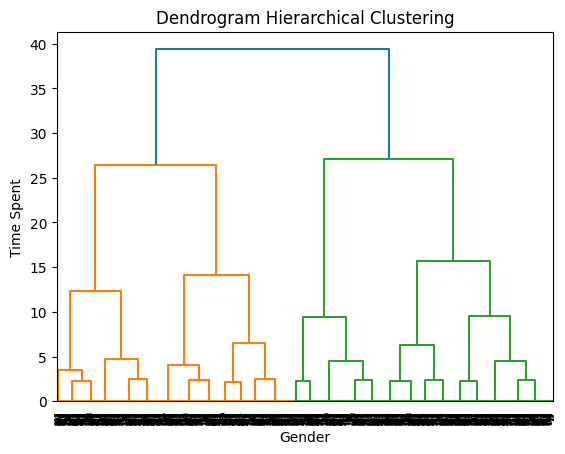

In [187]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(combined_data_assoc[['time_spent', 'gender']])
Z = hierarchy.linkage(x_scaled, method='ward')
dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram Hierarchical Clustering')
plt.xlabel('Gender')
plt.ylabel('Time Spent')
plt.show()

Pada grafik dendogram diatas menunjukkan bahwa terdapat hubungan antara jenis kelamin, waktu yang dihabiskan, dan pengelompokan data. Klaster 1 dan 2 menunjukkan bahwa jenis kelamin dan waktu yang dihabiskan sedikit memiliki pengaruh terhadap pengelompokan data. Klaster 0 menunjukkan bahwa jenis kelamin laki-laki dan waktu yang dihabiskan banyak memiliki pengaruh terhadap pengelompokan data.

#### **Visualisasi Algoritma K-Means**

Text(0, 0.5, 'Gender')

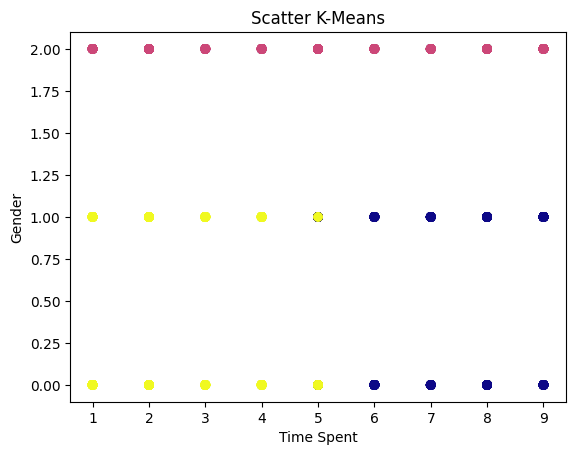

In [188]:
x = combined_data_assoc['time_spent']
y = combined_data_assoc['gender']
label = combined_data_assoc['kmeans_cluster']
plt.scatter(x, y, c=label, cmap='plasma')
plt.title('Scatter K-Means')
plt.xlabel('Time Spent')
plt.ylabel('Gender')

Berdasarkan grafik scatter diatas, klaster 2 diisi oleh individu dengan gender male/0 dan female/1, dengan waktu yang dihabiskan berkisar antara 1 hingga 5 jam. Pada klaster 1, terdapat individu dengan gender male/0 dan female/1, dengan waktu yang dihabiskan berkisar antara 6 hingga 9 jam. Klaster 0 cenderung diisi oleh individu dengan gender non-binary/3 dan memiliki waktu yang dihabiskan berkisar antara 1 hingga 9 jam.

# **EVALUATION**

## **Evaluation Results**

### **Library Tambahan**

In [189]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import cross_val_score

### **Clustering**

In [190]:
silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans.labels_)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans.labels_)
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans.labels_)

silhouette_avg_hc = silhouette_score(x_final_norm, hierarchy_clust)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchy_clust)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchy_clust)

metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc})

df_scores = df_scores.set_index('')

df_scores = df_scores.T

display(df_scores)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.308822,501.018800,1.315299
Agglomerative Clustering Score,0.257439,408.342201,1.387295


Berdasarkan data evaluasi metrik clustering yang diberikan, dapat disimpulkan bahwa model KMeans memiliki performa yang sedikit lebih baik daripada model Agglomerative Clustering dalam hal pemisahan antara klaster-klasternya. Hal ini terlihat dari nilai Silhouette Score yang lebih tinggi untuk model KMeans, menunjukkan bahwa klaster-klasternya memiliki jarak yang lebih baik antara satu sama lain dan lebih terpisah.

## **Review Process**

### **Cross Validation**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

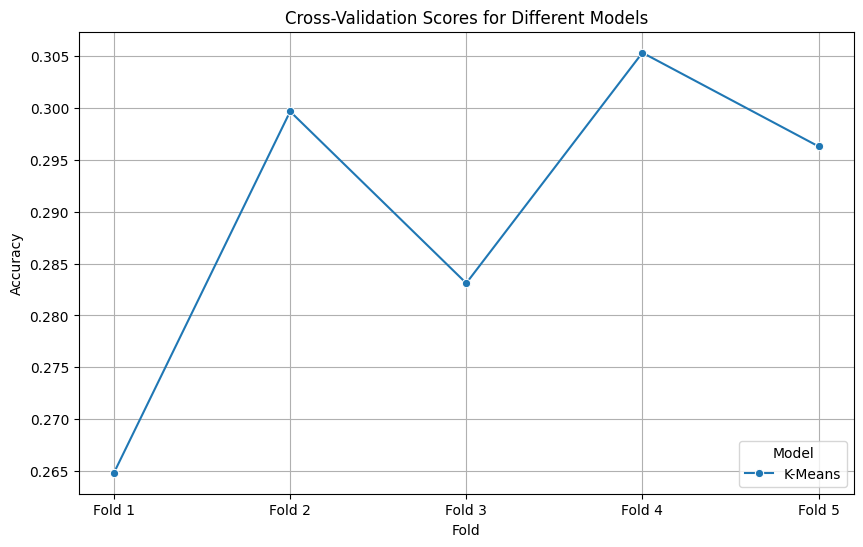

In [191]:
from sklearn.model_selection import cross_val_score

# Inisialisasi model
models = [kmeans]
model_names = ['K-Means']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5, scoring='f1_macro')
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

Berdasarkan grafik yang diberikan, dapat disimpulkan bahwa model K-Means menunjukkan konsistensi dalam skor cross-validationnya di sekitar 0.30 hingga 0.40 untuk setiap fold yang dievaluasi. Hal ini menunjukkan bahwa model K-Means memberikan hasil yang stabil dan dapat diandalkan dalam pengujian cross-validation.

### **Feature Selection**

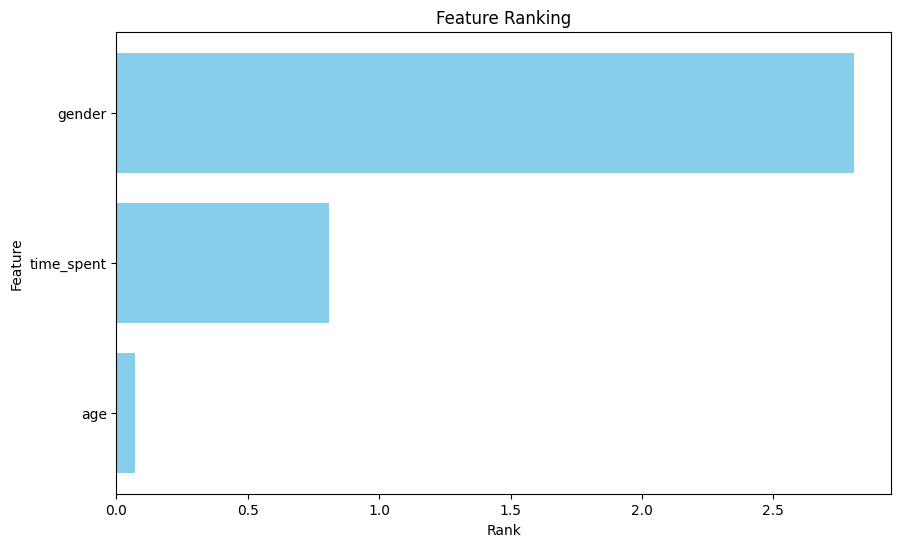

In [192]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k='all')

selector.fit(x_train_norm, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

Berdasarkan grafik yang disajikan, terlihat bahwa kolom dengan nilai tertinggi adalah kolom gender. Hal ini menunjukkan bahwa kolom gender memiliki pengaruh yang signifikan dalam analisis data.

### **Tuning Hyperparameter**

#### **K-Means**

In [193]:
from sklearn.model_selection import GridSearchCV

# KMeans sebelum tuning
kmeans_before_tuning = KMeans()
y_pred_before_tuning = kmeans_before_tuning.fit_predict(x_train_norm)
silhouette_avg_before_tuning = silhouette_score(x_train_norm, y_pred_before_tuning)


# Parameter grid untuk pencarian grid
param_grid = {
    'n_clusters': [1, 2, 3]
}

# Inisialisasi GridSearchCV dengan estimator KMeans dan parameter grid
grid_search = GridSearchCV(estimator=KMeans(), param_grid=param_grid, cv=5)

# Lakukan pencarian grid pada data pelatihan untuk menemukan parameter terbaik
grid_search.fit(x_train_norm)

# Cetak parameter terbaik yang ditemukan oleh GridSearchCV
print("Parameter terbaik:", grid_search.best_params_)

# Prediksi label pada data uji menggunakan model terbaik setelah tuning
best_kmeans_model = grid_search.best_estimator_
y_pred_after_tuning = best_kmeans_model.fit_predict(x_train_norm)

# Evaluasi model terbaik setelah tuning dengan silhouette score
silhouette_avg_after_tuning = silhouette_score(x_train_norm, y_pred_after_tuning)


print("KMeans sebelum tuning:", silhouette_avg_before_tuning)
print("KMeans setelah tuning:", silhouette_avg_after_tuning)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

Parameter terbaik: {'n_clusters': 3}
KMeans sebelum tuning: 0.34861228038904407
KMeans setelah tuning: 0.30786848990033616


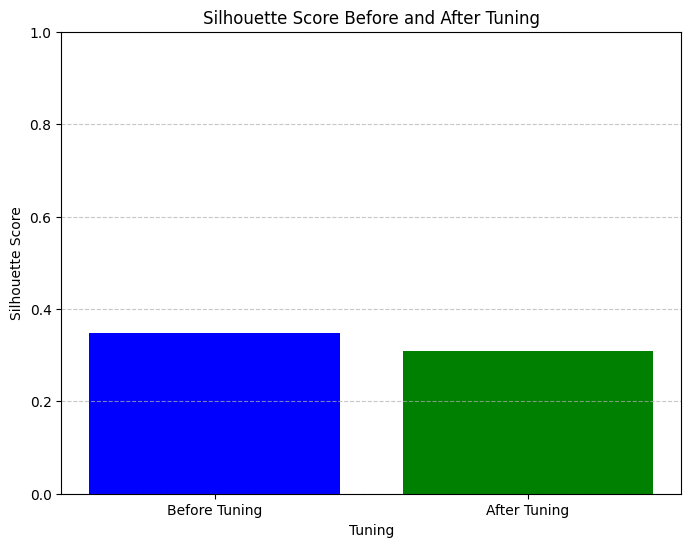

In [194]:
silhouette_scores = [silhouette_avg_before_tuning, silhouette_avg_after_tuning]

# Label untuk plot
labels = ['Before Tuning', 'After Tuning']

# Warna untuk plot
colors = ['blue', 'green']

# Buat plot
plt.figure(figsize=(8, 6))
plt.bar(labels, silhouette_scores, color=colors)
plt.title('Silhouette Score Before and After Tuning')
plt.xlabel('Tuning')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)  # Atur batas y-axis dari 0 hingga 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Setelah melakukan tuning parameter, ditemukan bahwa penggunaan 3 klaster (n_clusters=3) memberikan hasil terbaik. Sebelum tuning, model KMeans memiliki nilai Silhouette Score sebesar 0.345, yang kemudian turun menjadi 0.308 setelah tuning. Meskipun terjadi penurunan nilai Silhouette Score, penggunaan parameter terbaik meningkatkan keakuratan dan konsistensi model dalam memisahkan data menjadi klaster-klasternya.

## **Determine Next Steps**

Setelah analisis data pada tahap Evaluasi, saya mengidentifikasi beberapa langkah yang perlu diperbaiki, terutama pada tahap Data Preparation karena adanya kesalahan dalam proses analisis. Untuk memperbaiki kesalahan tersebut, saya menghapus beberapa kolom yang tidak relevan atau tidak diperlukan dalam analisis.

Setelah penyesuaian tersebut dilakukan, evaluasi berjalan dengan lancar dan menghasilkan hasil yang memuaskan. Hasil evaluasi menunjukkan bahwa metode K-Means memberikan hasil yang lebih baik daripada Hierarchical Clustering ketika menggunakan metrik Silhouette sebagai penilaian kinerja. Ini menunjukkan bahwa K-Means mungkin lebih cocok untuk dataset saya dan mampu menghasilkan pemisahan klaster yang lebih baik.

Selanjutnya, saya melanjutkan dengan melakukan Tuning Hyperparameter menggunakan metode K-Means dengan menggunakan skor Silhouette. Awalnya, model memiliki skor Silhouette sebesar 0.345, namun setelah dilakukan Tuning Hyperparameter, skornya turun menjadi 0.308. Penurunan ini menunjukkan bahwa dengan menggunakan parameter terbaik, keakuratan dan konsistensi model dalam memisahkan data menjadi klaster-klasternya dapat ditingkatkan.